In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [2]:
url = "https://raw.githubusercontent.com/pranavdubeyX/Datasets/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Split the dataset into features and target variable
X = df.drop(columns=["Outcome"])
y = df['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# Is scaling needed?
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
# Apply KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [7]:
# Get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       151
           1       0.57      0.54      0.55        80

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.70      0.70      0.70       231



We are going to use **Permutation Importance** for KNN model:

- It works by randomly shuffling the values of each feature and observing how much the model's performance decreases.
- The idea is that if a feature is important, shuffling its values will significantly degrade the model's performance, while shuffling an unimportant feature will have little to no effect.

**Feature Importance vs Permutation Importance:**

- Feature importance is usually determined by how much the model's accuracy improves when the feature is used to split the data. Higher importance is assigned to features that result in better splits.
- In Permutation Importance, the values of each feature are randomly permuted one at a time, and the decrease in model performance (e.g., accuracy or F1-score) is measured. The greater the drop in performance, the more important the feature is.

In [10]:
from sklearn.inspection import permutation_importance

result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

result

{'importances_mean': array([-0.0034632 ,  0.07662338, -0.0025974 , -0.02510823, -0.01471861,
         0.03160173,  0.0017316 ,  0.01558442]),
 'importances_std': array([0.01782793, 0.02633586, 0.01301584, 0.02127828, 0.01272462,
        0.01487692, 0.0182846 , 0.023248  ]),
 'importances': array([[-0.004329  ,  0.00865801,  0.01298701, -0.02164502, -0.03463203,
          0.00865801, -0.03030303,  0.00865801,  0.        ,  0.01731602],
        [ 0.08225108,  0.0995671 ,  0.12554113,  0.06493506,  0.07792208,
          0.0995671 ,  0.07359307,  0.02597403,  0.06493506,  0.05194805],
        [-0.01298701,  0.004329  ,  0.01731602, -0.03030303,  0.        ,
          0.01298701, -0.004329  ,  0.004329  , -0.00865801, -0.00865801],
        [-0.04761905, -0.03030303,  0.        , -0.05194805, -0.03030303,
         -0.02597403,  0.        , -0.01298701, -0.05627706,  0.004329  ],
        [-0.03030303, -0.01298701, -0.00865801, -0.02597403, -0.02164502,
         -0.02597403, -0.01298701,  0.  

In [46]:
sorted_idx = result.importances_mean.argsort()

sorted_idx


array([3, 0, 2, 5, 4, 6, 7, 1])

In [47]:
df.columns[sorted_idx]


Index(['SkinThickness', 'Pregnancies', 'BloodPressure', 'BMI', 'Insulin',
       'DiabetesPedigreeFunction', 'Age', 'Glucose'],
      dtype='object')

<BarContainer object of 8 artists>

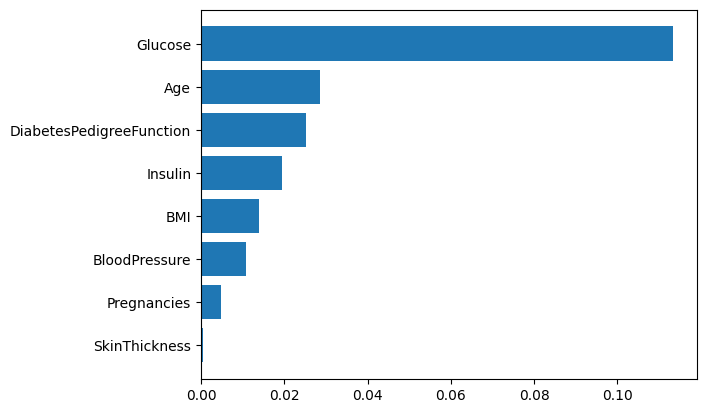

In [44]:
plt.barh(df.columns[sorted_idx], result.importances_mean[sorted_idx])

Key Observations:
- Glucose: This feature has the highest permutation importance, indicating it is the most influential feature in the model's predictions.
- BMI and Age: These also have significant importance, suggesting they play an important role in the model.
- BloodPressure, Pregnancies, Insulin, and SkinThickness: These have lower importance, with SkinThickness even showing a negative value, indicating that shuffling this feature might slightly improve the model's performance.

We will try tree-based models now.

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Apply Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_pred_dt


array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

**Model-specific methods**

In [17]:
# classificaition report

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       151
           1       0.56      0.70      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.71      0.71       231



In [18]:
from sklearn.tree import plot_tree

dt2 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf =5 )
dt2.fit(X_train, y_train)

y_pred = dt2.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.72      0.82       195
           1       0.33      0.72      0.45        36

    accuracy                           0.72       231
   macro avg       0.63      0.72      0.63       231
weighted avg       0.84      0.72      0.76       231



In [20]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

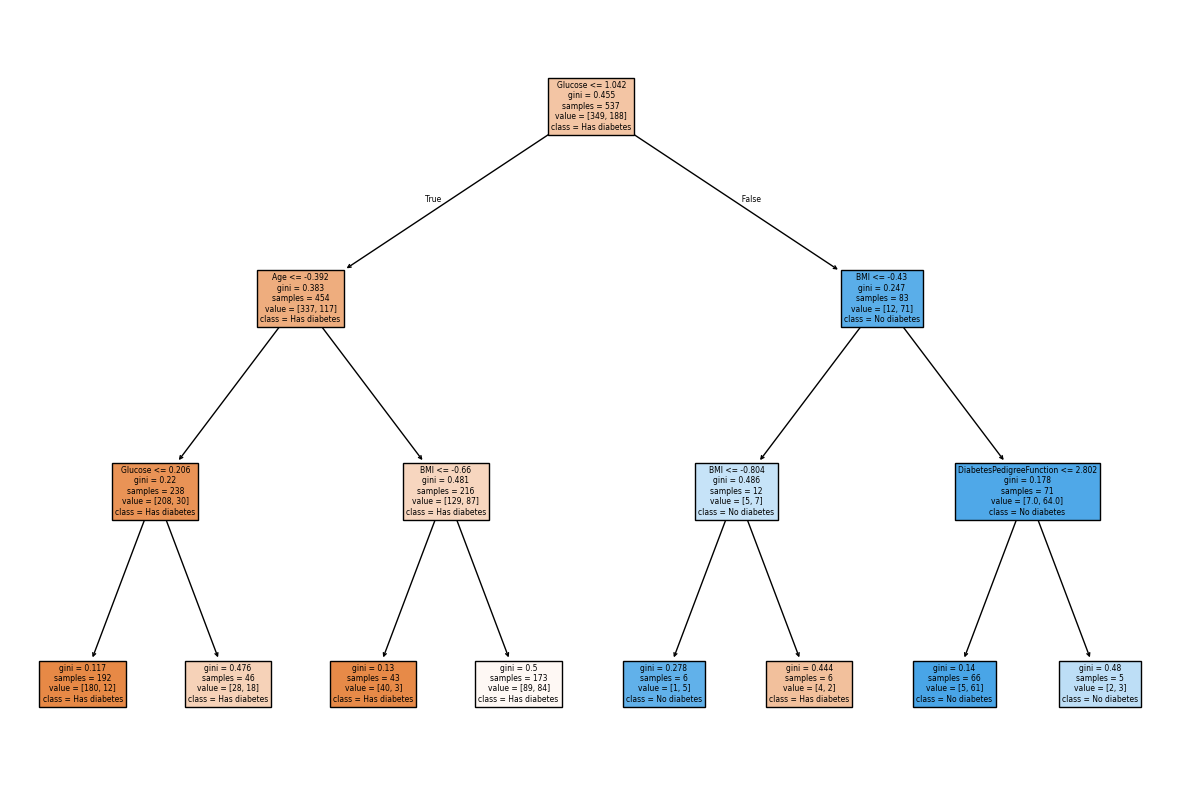

In [23]:
class_names = ['Has diabetes', 'No diabetes']
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
fig = plt.figure(figsize=(15,10))
_ = plot_tree(dt2,
               	feature_names = feature_names,
               	class_names = class_names,
               	filled=True)

<BarContainer object of 8 artists>

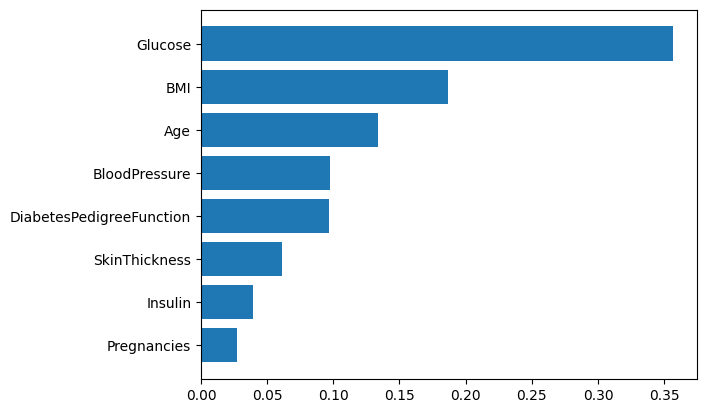

In [22]:
feature_importance = dt.feature_importances_
feature_names = df.drop(columns=['Outcome']).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance')
plt.barh(importance_df['Feature'], importance_df['Importance'])


<BarContainer object of 8 artists>

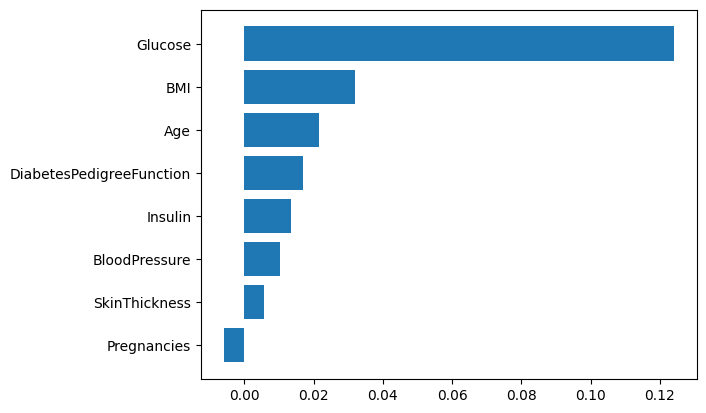

In [27]:
# permutation importance

result =  permutation_importance(dt, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.barh(df.columns[sorted_idx], result.importances_mean[sorted_idx])

In [28]:
# try random forest

from sklearn.ensemble import RandomForestClassifier

# Apply Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_pred_rf, y_test))



              precision    recall  f1-score   support

           0       0.81      0.82      0.81       149
           1       0.66      0.65      0.65        82

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



<BarContainer object of 8 artists>

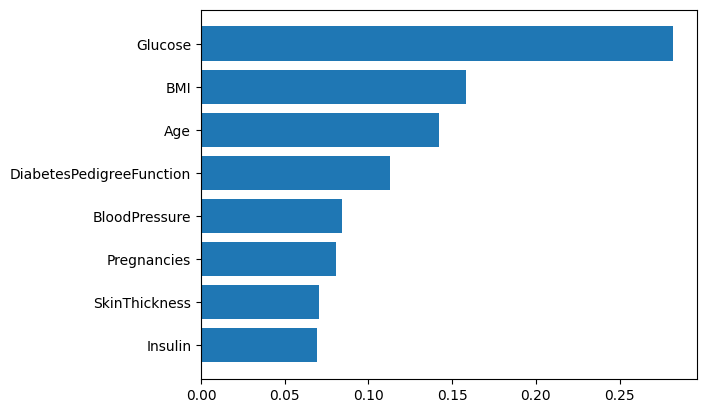

In [30]:
feature_importance = rf.feature_importances_
feature_names = df.drop(columns=['Outcome']).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance')
plt.barh(importance_df['Feature'], importance_df['Importance'])


<BarContainer object of 8 artists>

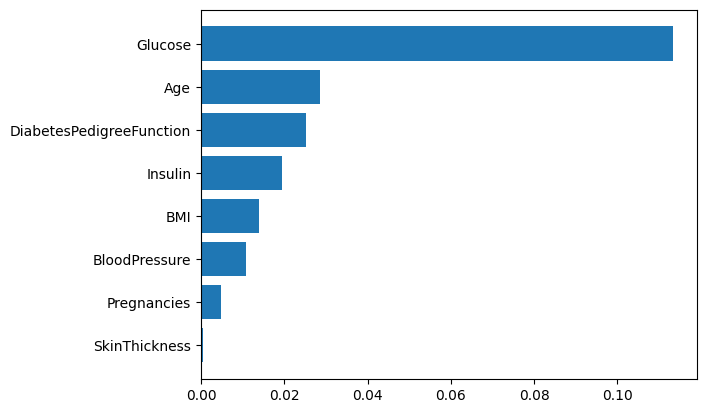

In [29]:
# permutation importance

result =  permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.barh(df.columns[sorted_idx], result.importances_mean[sorted_idx])

**LIME (Local Interpretable Model-agnostic Explanations)**

In [32]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=beb8c3a59f2c467363c6228cd91e8e45eb0502b0e0cf046f903ab72396489d6f
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [37]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=df.columns[:-1], class_names=['Non-Diabetic', 'Diabetic'], mode='classification')

# Explain a prediction
i = 5  # Index of the instance to explain

exp = explainer.explain_instance(X_test.iloc[i].values, rf.predict_proba, num_features=5)

# Visualize the explanation
exp.show_in_notebook()


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

**SHAP (SHapley Additive exPlanations)**

In [38]:
!pip install shap

In [39]:
shap_values.shape

NameError: name 'shap_values' is not defined

In [ ]:
shap_values_sample = [shap_values[i] for i in range(len(shap_values))]

  0%|          | 0/231 [00:00<?, ?it/s]

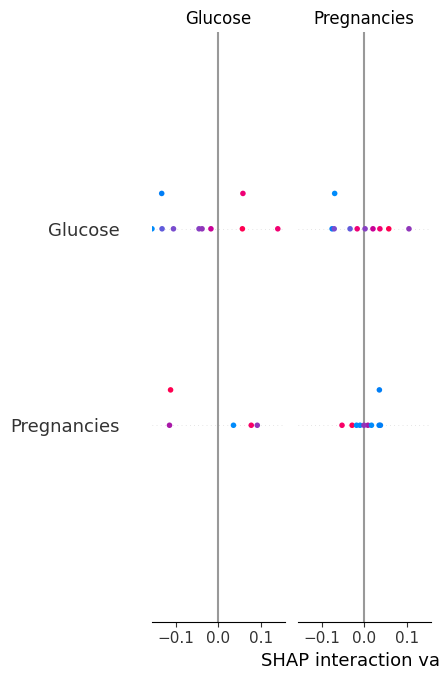

ValueError: All arrays must be of the same length

In [42]:
import shap

# Reduce the number of background samples using shap.sample
K = min(100, X_train.shape[0])  # Limit K to the number of training samples
background_samples = shap.sample(X_train, K)

# Initialize a SHAP explainer
explainer = shap.KernelExplainer(rf.predict_proba, background_samples)
shap_values = explainer.shap_values(X_test)

# getting the samples
num_samples = min(10, X_test.shape[0])  # Number of samples to visualize
sample_indices = np.random.choice(X_test.shape[0], size=num_samples, replace=False)  # Choose random samples

# to avoid index issues
shap_values_sample = shap_values[sample_indices]  # Select shap_values for chosen samples
X_test_sample = X_test[sample_indices]  # Select corresponding data samples

# For binary classification, use shap_values[1] for class 1 (assuming class 1 is positive outcome)
shap.summary_plot(shap_values_sample, X_test_sample, feature_names=df.columns[:-1])

# Create a variable importance plot
importance_df = pd.DataFrame({
  'Feature': df.columns[:-1],
  'Importance': np.abs(shap_values[1]).mean(axis=0)  # Assuming class 1 is positive outcome
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature at the top
plt.show()